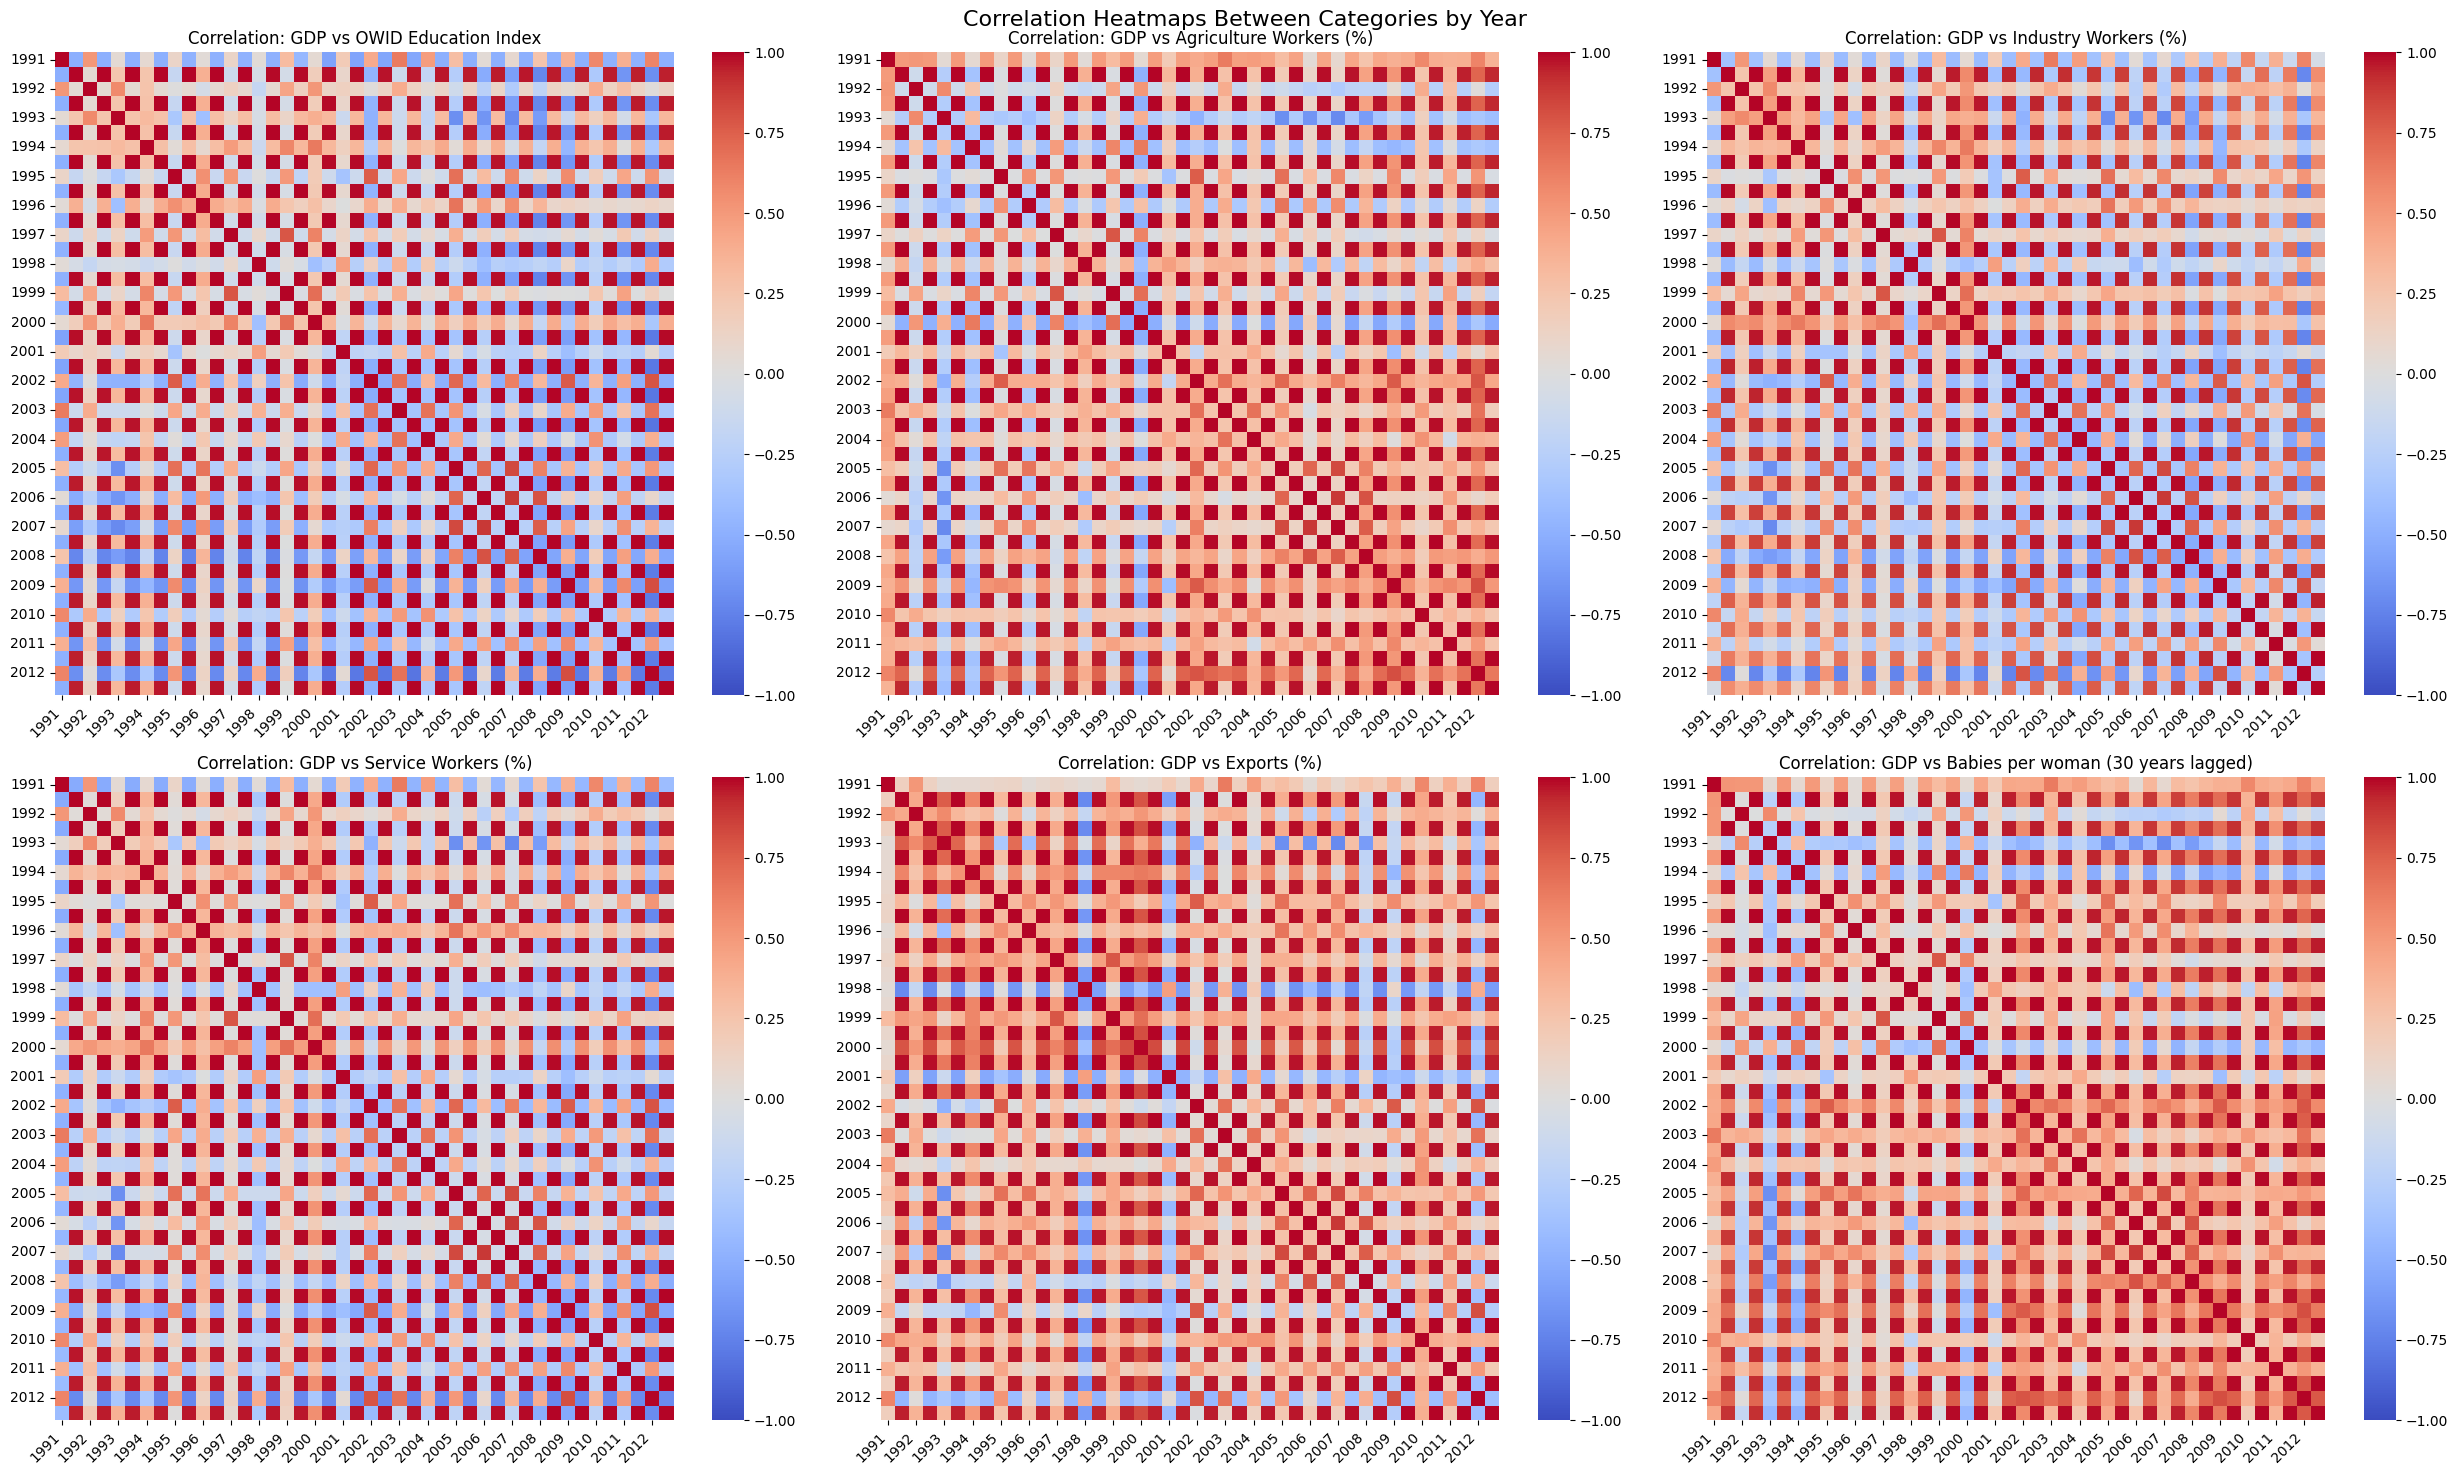

In [2]:
from __future__ import print_function
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Our dataset has nonstandard minus signs, so this function is used to handle those
def safe_float(x):
    if isinstance(x, str):
        x = x.replace(u'\u2212', '-').replace(u'\u2013', '-')
    try:
        return float(x)
    except ValueError:
        return np.nan
    
df = pd.read_csv('/Users/pallavi/Desktop/final_data.csv')
column_names = [str(year) for year in range(1991, 2013)]
for col in column_names:
    df[col] = df[col].apply(safe_float)

# Calculate correlations for each category and plot heatmap
def category_correlation_between(data, cat1, cat2):
    df1 = data[data['category'] == cat1][column_names].reset_index(drop=True)
    df2 = data[data['category'] == cat2][column_names].reset_index(drop=True)
    combined = pd.concat([df1, df2], axis=1)
    return combined.corr().loc[column_names, column_names]

categories = df['category'].unique()
category_pairs = list(itertools.combinations(categories, 2))
correlations = {f'{cat1} vs {cat2}': category_correlation_between(df, cat1, cat2) for cat1, cat2 in category_pairs}

fig, axes = plt.subplots(2, 3, figsize=(25, 15))
fig.suptitle('Correlation Heatmaps Between Categories by Year', fontsize=16)
axes = axes.flatten()

for i, (pair, corr) in enumerate(correlations.items()):
    if i < len(axes):
        sns.heatmap(corr, ax=axes[i], cmap='coolwarm', vmin=-1, vmax=1, center=0, annot=False)
        axes[i].set_title('Correlation: {}'.format(pair))
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()
